In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/thaibao1306/data/main/Fremont_Bridge_Bicycle_Counter.csv')
data.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,10/03/2012 12:00:00 AM,13.0,4.0,9.0
1,10/03/2012 01:00:00 AM,10.0,4.0,6.0
2,10/03/2012 02:00:00 AM,2.0,1.0,1.0
3,10/03/2012 03:00:00 AM,5.0,2.0,3.0
4,10/03/2012 04:00:00 AM,7.0,6.0,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87600 entries, 0 to 87599
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          87600 non-null  object 
 1   Fremont Bridge Total          87586 non-null  float64
 2   Fremont Bridge East Sidewalk  87586 non-null  float64
 3   Fremont Bridge West Sidewalk  87586 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.7+ MB


In [4]:
data[data.isnull().any(axis=1)]

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
3794,03/10/2013 02:00:00 AM,NaN,NaN,NaN
6105,06/14/2013 09:00:00 AM,NaN,NaN,NaN
6106,06/14/2013 10:00:00 AM,NaN,NaN,NaN
12530,03/09/2014 02:00:00 AM,NaN,NaN,NaN
21266,03/08/2015 02:00:00 AM,NaN,NaN,NaN
22331,04/21/2015 11:00:00 AM,NaN,NaN,NaN
22332,04/21/2015 12:00:00 PM,NaN,NaN,NaN
30170,03/13/2016 02:00:00 AM,NaN,NaN,NaN
38906,03/12/2017 02:00:00 AM,NaN,NaN,NaN
47642,03/11/2018 02:00:00 AM,NaN,NaN,NaN


<AxesSubplot:>

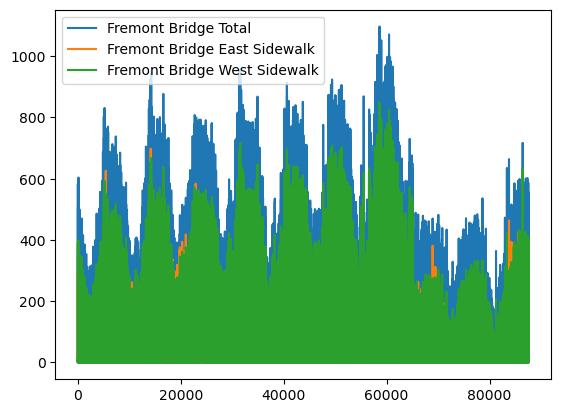

In [5]:
data.dropna(inplace=True)
data.plot()

In [6]:
data['Date'] =pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True, drop=True)
byMonth = data.resample('M').sum()

<AxesSubplot:xlabel='Date'>

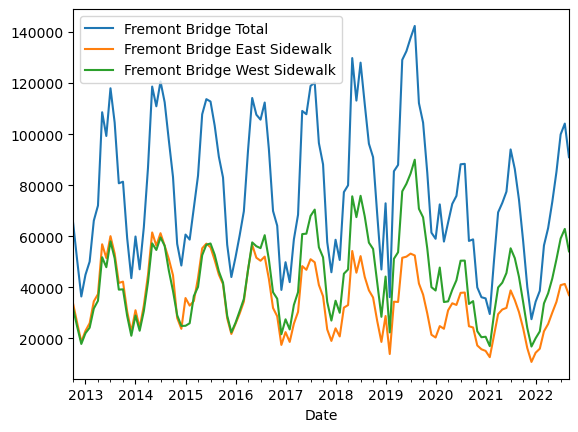

In [8]:
byMonth.plot()

###
- Trong nhung nam gan day tu 2017 thi phia tay co xu huong dap xe nhieu hon
- Nguoi dap xe co xu huong dap xe nhieu vao mua he va it hon o mua dong

<AxesSubplot:xlabel='time'>

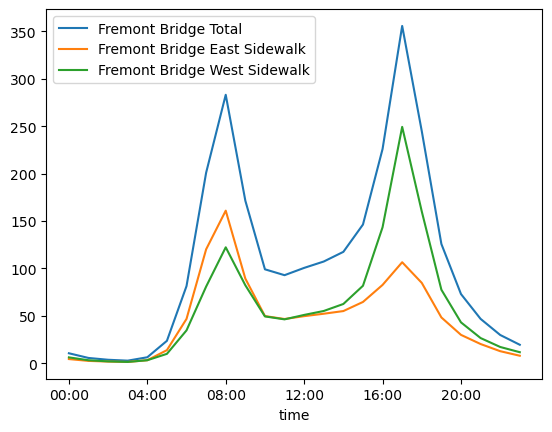

In [19]:
bytime = data.groupby(data.index.time).mean()
xtime = np.arange(6)*60*60*4
bytime.plot(xticks= xtime)

###
- Moi nguoi dap xe nhieu hon vao 7-9h va 16-17h (la gio di lam/ di lam ve)
- It nguoi dap xe vao buoi trua/toi, hiem khi dap xe vao sang som

In [22]:
dayofweek = np.where(data.index.day_of_week<5, "Workingday","Weekend")
bydatetime = data.groupby(by=[dayofweek,data.index.time]).mean()

<AxesSubplot:xlabel='time'>

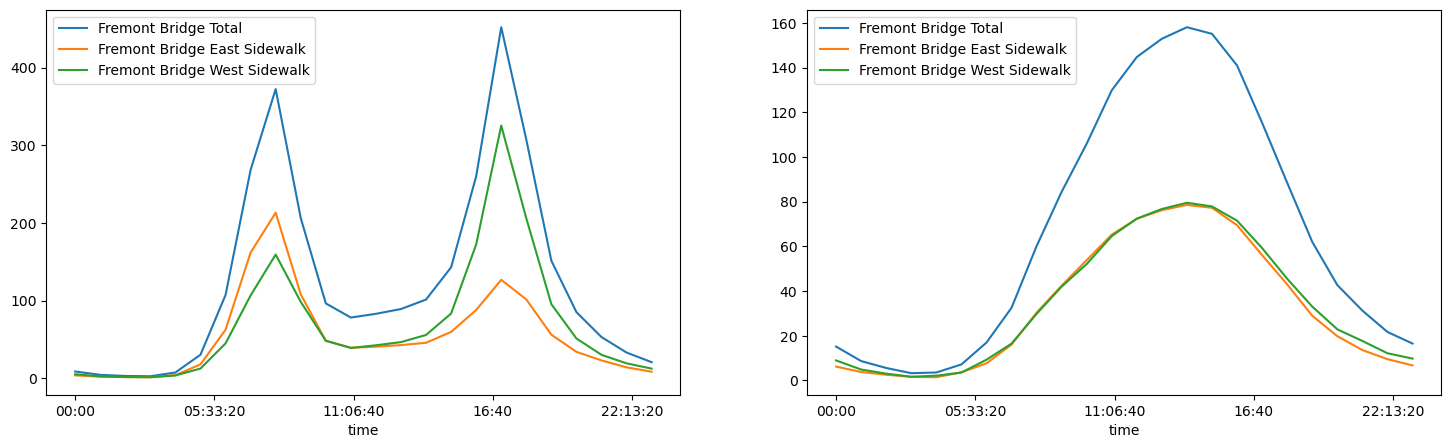

In [35]:
fig, ax = plt.subplots(1,2, figsize= (18,5))
bydatetime.loc['Workingday'].plot(ax= ax[0])
bydatetime.loc['Weekend'].plot(ax= ax[1])

### Working days:
- So nguoi dap xe nhieu nhat vao gio di lam

### Weekend:
- Cuoi tuan thi so luong nguoi dap xe cao nhat vao buoi chieu khoang 2-3 PM

<AxesSubplot:>

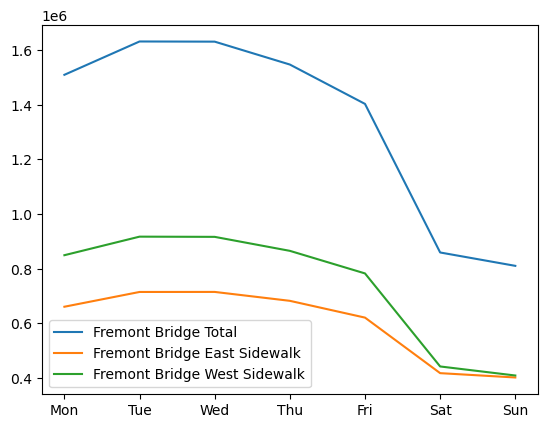

In [38]:
byWeek = data.groupby(data.index.weekday).sum()
daylist = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
byWeek.index = daylist
byWeek.plot()

### So luong nguoi dap xe trong ngay di lam cao hon ro ret so voi cuoi tuan